In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

In [2]:
datos_antigua_full = pd.read_csv("l_Unif.csv", delimiter=",", on_bad_lines='skip')
datos_nueva_full = pd.read_csv("a_Unif.csv", delimiter=",", on_bad_lines='skip')

In [3]:
#datos_antigua = datos_antigua_full.sample(n =100)
#datos_nueva = datos_nueva_full.sample(n = 100)
datos_antigua = datos_antigua_full
datos_nueva = datos_nueva_full

In [4]:
datos_nueva.tail()

,# Shape,Cry_st,bx,by,bz,C00,C01,C02,C03,C04,...,eig_490,eig_491,eig_492,eig_493,eig_494,eig_495,eig_496,eig_497,eig_498,eig_499
29996,0.0,3.0,0.527721,1.431096,1.324118,3.331657,0.175096,0.175096,0.0,0.0,...,715.571494,719.443372,719.518907,719.809925,721.634486,725.075803,727.737746,732.841368,735.434923,736.197682
29997,0.0,0.0,1.756533,0.459669,1.238507,1.113352,0.542304,0.338319,0.0,0.0,...,258.049045,259.091011,259.274689,260.049526,260.561790,260.893763,263.561157,265.061084,265.372427,266.935081
29998,1.0,1.0,1.427095,1.192627,0.748088,4.737098,1.087592,1.718328,0.0,0.0,...,559.277332,560.676937,561.555500,562.353792,563.183851,567.613738,568.359927,570.544485,572.129285,572.464863
29999,1.0,2.0,0.289548,2.152020,2.043356,3.938017,1.218913,1.218913,0.0,0.0,...,525.597478,525.828360,527.342656,528.506205,529.638156,534.887378,536.459675,536.545934,537.009500,537.303426
30000,2.0,2.0,0.243873,1.144756,6.841083,2.762152,0.849696,0.849696,0.0,0.0,...,1290.636360,1298.439347,1299.272935,1302.736591,1311.828402,1314.083103,1315.727238,1321.357617,1330.792152,1346.374829


In [5]:
def normalizar(d_frame):
    for column in d_frame.keys()[2:]:
        if not sum(d_frame[column]) == 0:
            the_minimus = min(d_frame[column])
            the_maximus = max(d_frame[column])
            d_frame[column] = (d_frame[column] - the_minimus)/(the_maximus - the_minimus)
    #fin for
#fin función

In [6]:
def one_hottear(d_frame, cols_discretas):
    cols_nuevas = []
    for column in cols_discretas:
        posibles_valores = set(d_frame[column])
        for i in posibles_valores:
            d_frame[column + str(i)] = 0
            d_frame.loc[d_frame[column] == i, column + str(i)] = 1
            cols_nuevas.append(column + str(i))
        #fin for 
        del d_frame[column]
    #fin for 
    d_frame.loc[:, cols_nuevas + [col for col in d_frame.columns if col not in cols_nuevas]]
#fin función

In [7]:
normalizar(datos_antigua)
normalizar(datos_nueva)
datos_nueva.head()

,# Shape,Cry_st,bx,by,bz,C00,C01,C02,C03,C04,...,eig_490,eig_491,eig_492,eig_493,eig_494,eig_495,eig_496,eig_497,eig_498,eig_499
0,0.0,0.0,0.339526,0.004467,0.142144,0.952140,0.498470,0.189068,0.0,0.0,...,0.155254,0.149624,0.149736,0.149953,0.150373,0.149743,0.151366,0.151284,0.151433,0.151137
1,0.0,1.0,0.021481,0.325344,0.063665,0.947752,0.349984,0.105795,0.0,0.0,...,0.110137,0.106046,0.106213,0.106251,0.106586,0.105606,0.105759,0.105306,0.105310,0.104934
2,0.0,1.0,0.094605,0.118703,0.044943,0.981407,0.105969,0.149161,0.0,0.0,...,0.047567,0.045789,0.045929,0.045976,0.045989,0.045568,0.045641,0.045517,0.045529,0.045428
3,1.0,3.0,0.088364,0.257632,0.026670,0.813243,0.297896,0.297896,0.0,0.0,...,0.141687,0.136484,0.136633,0.137110,0.137168,0.136105,0.136925,0.136763,0.137205,0.137886
4,0.0,1.0,0.096129,0.006464,0.427539,0.287015,0.169337,0.130747,0.0,0.0,...,0.120388,0.115675,0.115730,0.115814,0.115917,0.115079,0.115722,0.115295,0.115404,0.115042


In [8]:
one_hottear(datos_antigua, ["# Shape", "Cry_st"])
one_hottear(datos_nueva, ["# Shape", "Cry_st"])
datos_nueva.head()

/tmp/ipykernel_17656/4267985546.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d_frame[column + str(i)] = 0
/tmp/ipykernel_17656/4267985546.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d_frame[column + str(i)] = 0
/tmp/ipykernel_17656/4267985546.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.c

,bx,by,bz,C00,C01,C02,C03,C04,C05,C11,...,eig_497,eig_498,eig_499,# Shape0.0,# Shape1.0,# Shape2.0,Cry_st0.0,Cry_st1.0,Cry_st2.0,Cry_st3.0
0,0.339526,0.004467,0.142144,0.952140,0.498470,0.189068,0.0,0.0,0.0,0.866064,...,0.151284,0.151433,0.151137,1,0,0,1,0,0,0
1,0.021481,0.325344,0.063665,0.947752,0.349984,0.105795,0.0,0.0,0.0,0.947759,...,0.105306,0.105310,0.104934,1,0,0,0,1,0,0
2,0.094605,0.118703,0.044943,0.981407,0.105969,0.149161,0.0,0.0,0.0,0.981413,...,0.045517,0.045529,0.045428,1,0,0,0,1,0,0
3,0.088364,0.257632,0.026670,0.813243,0.297896,0.297896,0.0,0.0,0.0,0.813249,...,0.136763,0.137205,0.137886,0,1,0,0,0,0,1
4,0.096129,0.006464,0.427539,0.287015,0.169337,0.130747,0.0,0.0,0.0,0.287016,...,0.115295,0.115404,0.115042,1,0,0,0,1,0,0


In [9]:
# Para X tomaré N frecuencias (dadas po el usuario). Para "y" tomaré un CXX dado por el usuario
def info_mutua(N_freq_disp, Cobj, d_frame, opt = "Lineal"):
    if any("(omega^2)" in x for x in d_frame.keys()):
        key_str = "(omega^2)"
        N_col = 4
    elif any("eig" in x for x in d_frame.keys()):
        key_str = "eig"
        N_col = 3
    else:
        raise KeyError("No hay columnas llamadas eig_X o (omega^2)_X")
    #fin if 
    lista_ini = list(d_frame.keys()[:N_col]) + list(d_frame.keys()[-7:])
    lista_eig_raw = list(filter(lambda x: key_str in x, d_frame.keys()))
    if opt == "Log":
        indices_elegidos = np.logspace(0, np.log10(len(lista_eig_raw) - 1), N_freq_disp, dtype = int)
        indices_elegidos[0] = 0
        lista_eig = list(map(lambda x: key_str + "_" + str(x), indices_elegidos))
    else:
        lista_eig = lista_eig_raw[:N_freq_disp]
    #fin if 
    lista_X = lista_ini + lista_eig
    X = d_frame[lista_X]
    y = d_frame[Cobj]
    resp = mutual_info_regression(X, y, discrete_features=tuple(range(N_col, N_col+7)))
    return (resp, lista_X)
#fin función

In [10]:
N_disp = 10
options = "Lineal"
targets = ["C00", "C11", "C22", "C33", "C44", "C55", "C01", "C02", "C12"]
listas_antiguas = []
listas_nuevas = []
MI_antiguas = []
MI_nuevas = []
for i in range(len(targets)):
    target = targets[i]
    MI_antigua_info = info_mutua(N_disp, target, datos_antigua, options)
    MI_nueva_info = info_mutua(N_disp, target, datos_nueva, options)
    MI_antiguas.append(MI_antigua_info[0])
    MI_nuevas.append(MI_nueva_info[0])
    listas_antiguas.append(MI_antigua_info[1])
    listas_nuevas.append(MI_nueva_info[1])
#fin for 

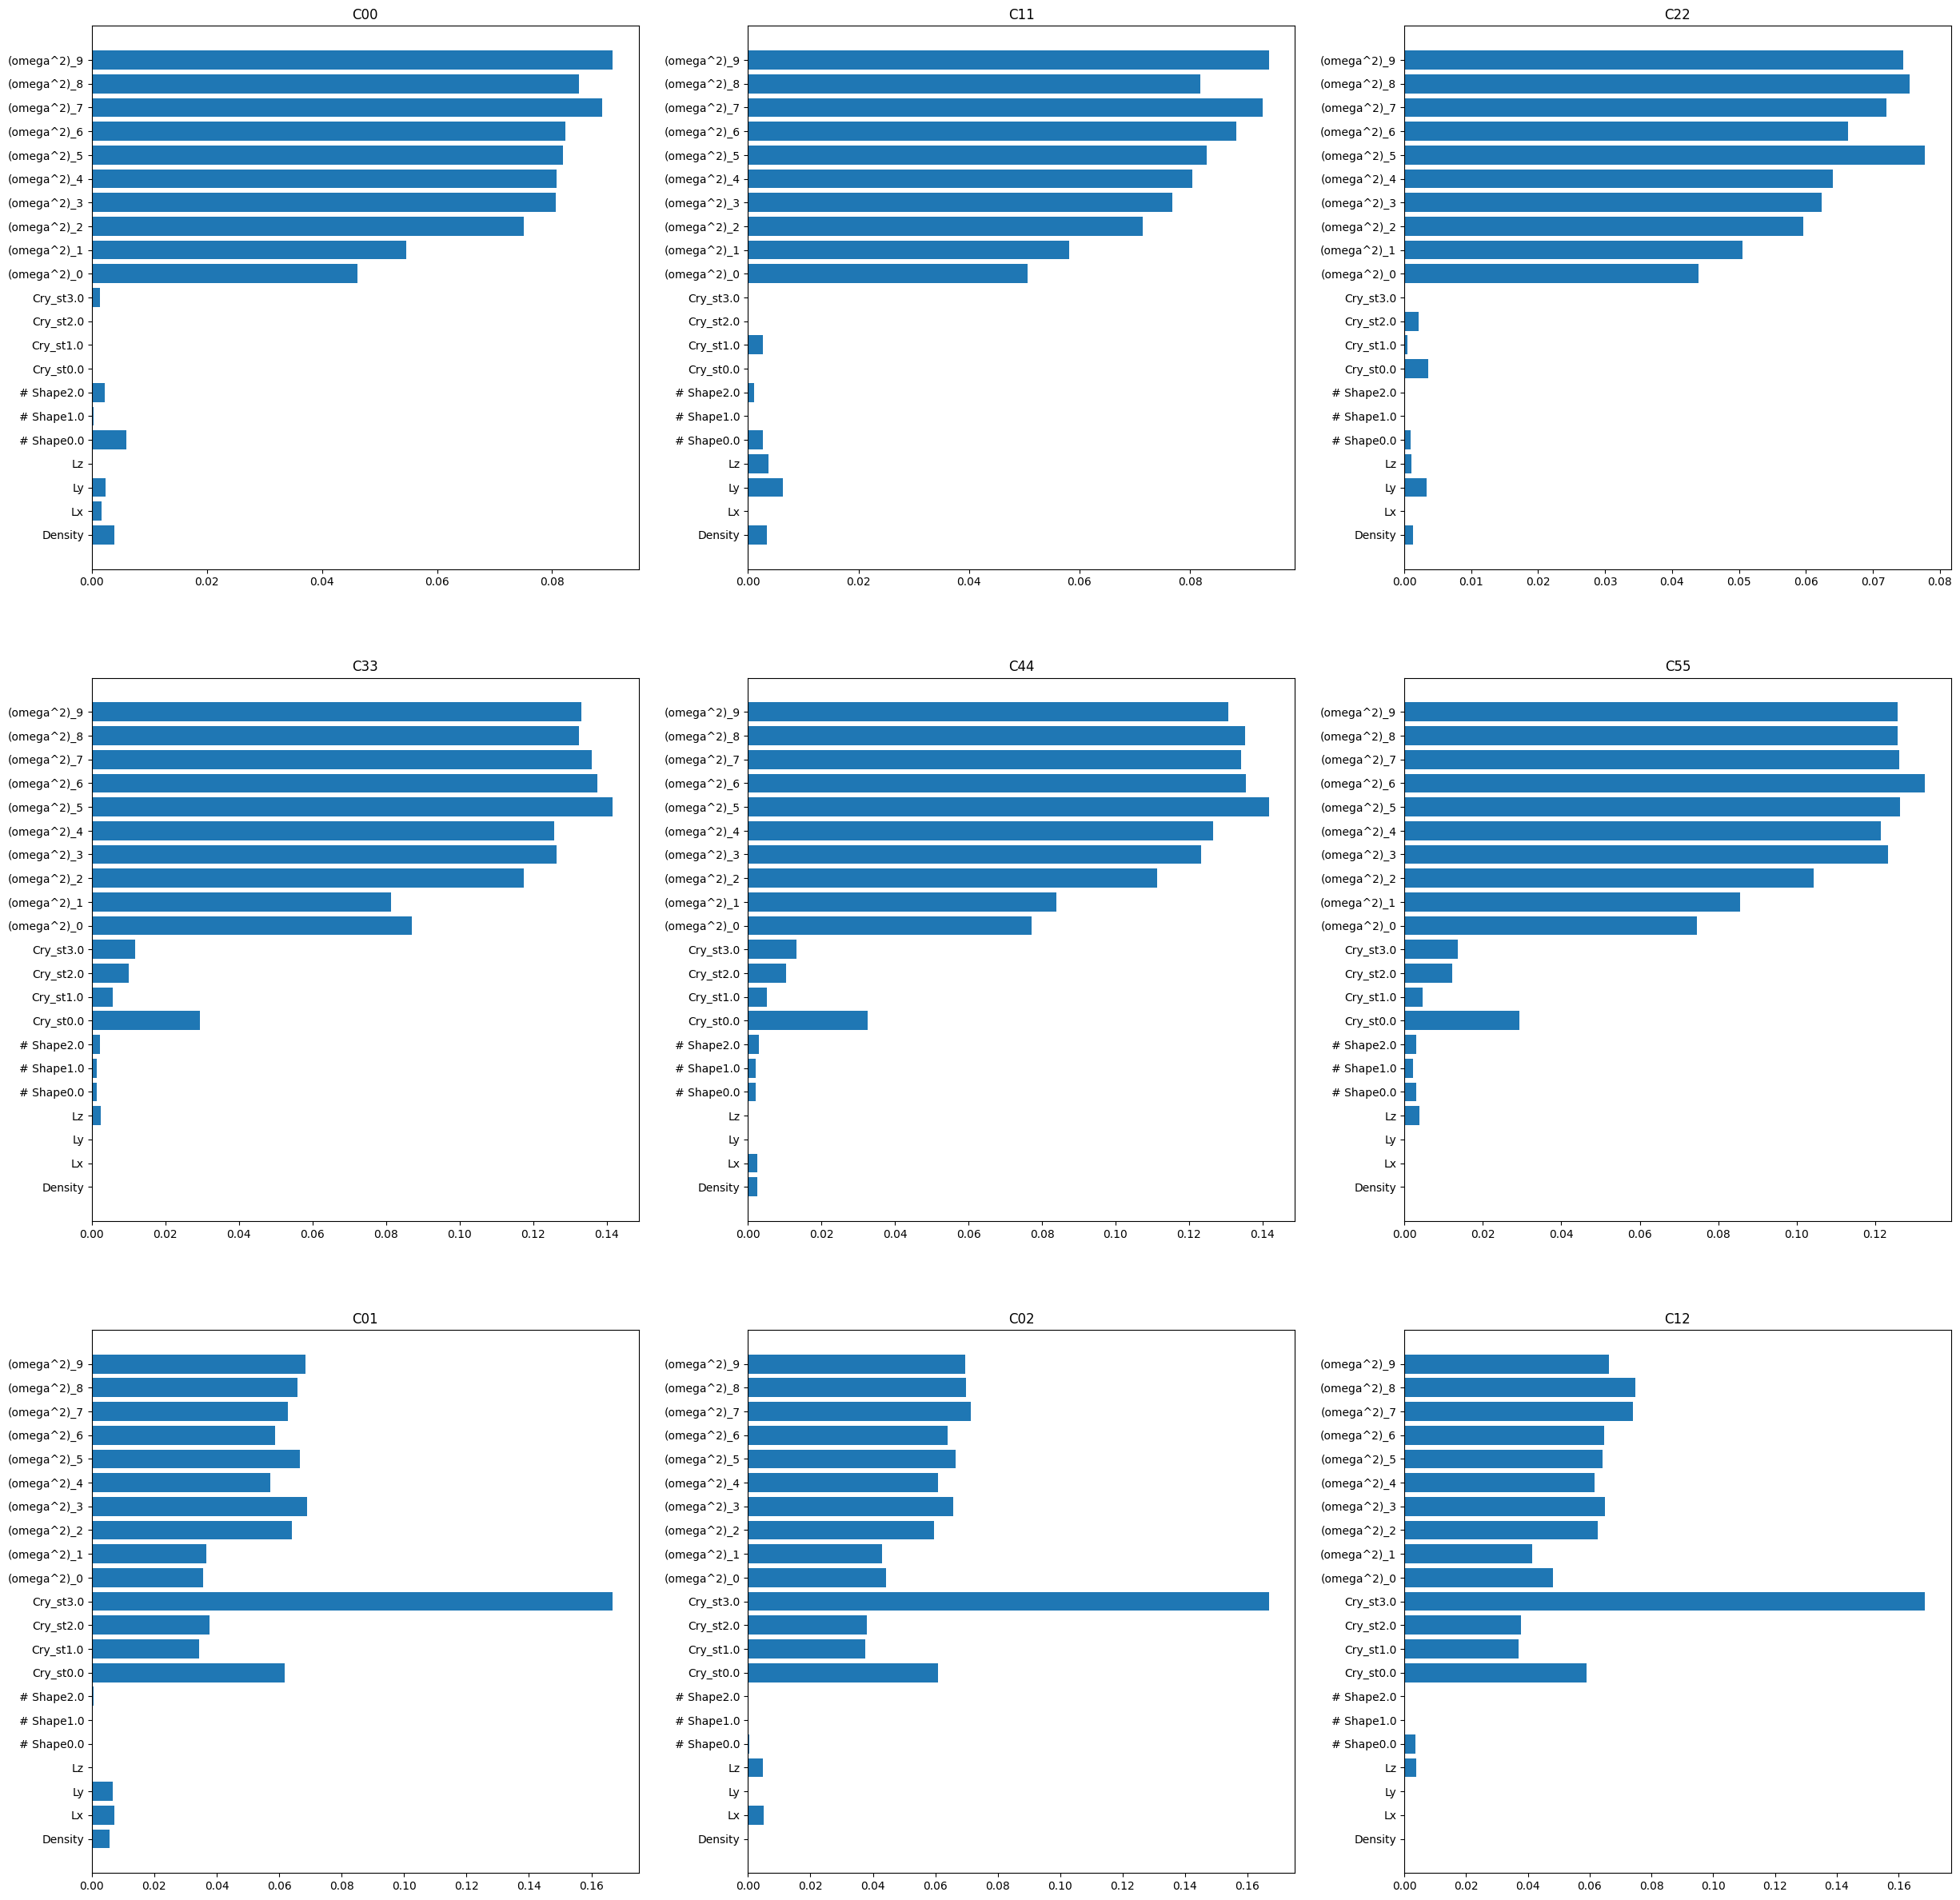

In [11]:
fig1 = plt.figure(figsize=(30,30))
for i in range(len(targets)):
    num = int(str(33) + str(i+1))
    target = targets[i]
    ax = fig1.add_subplot(num)
    ax.barh(listas_antiguas[i], MI_antiguas[i])
    ax.set_title(target)

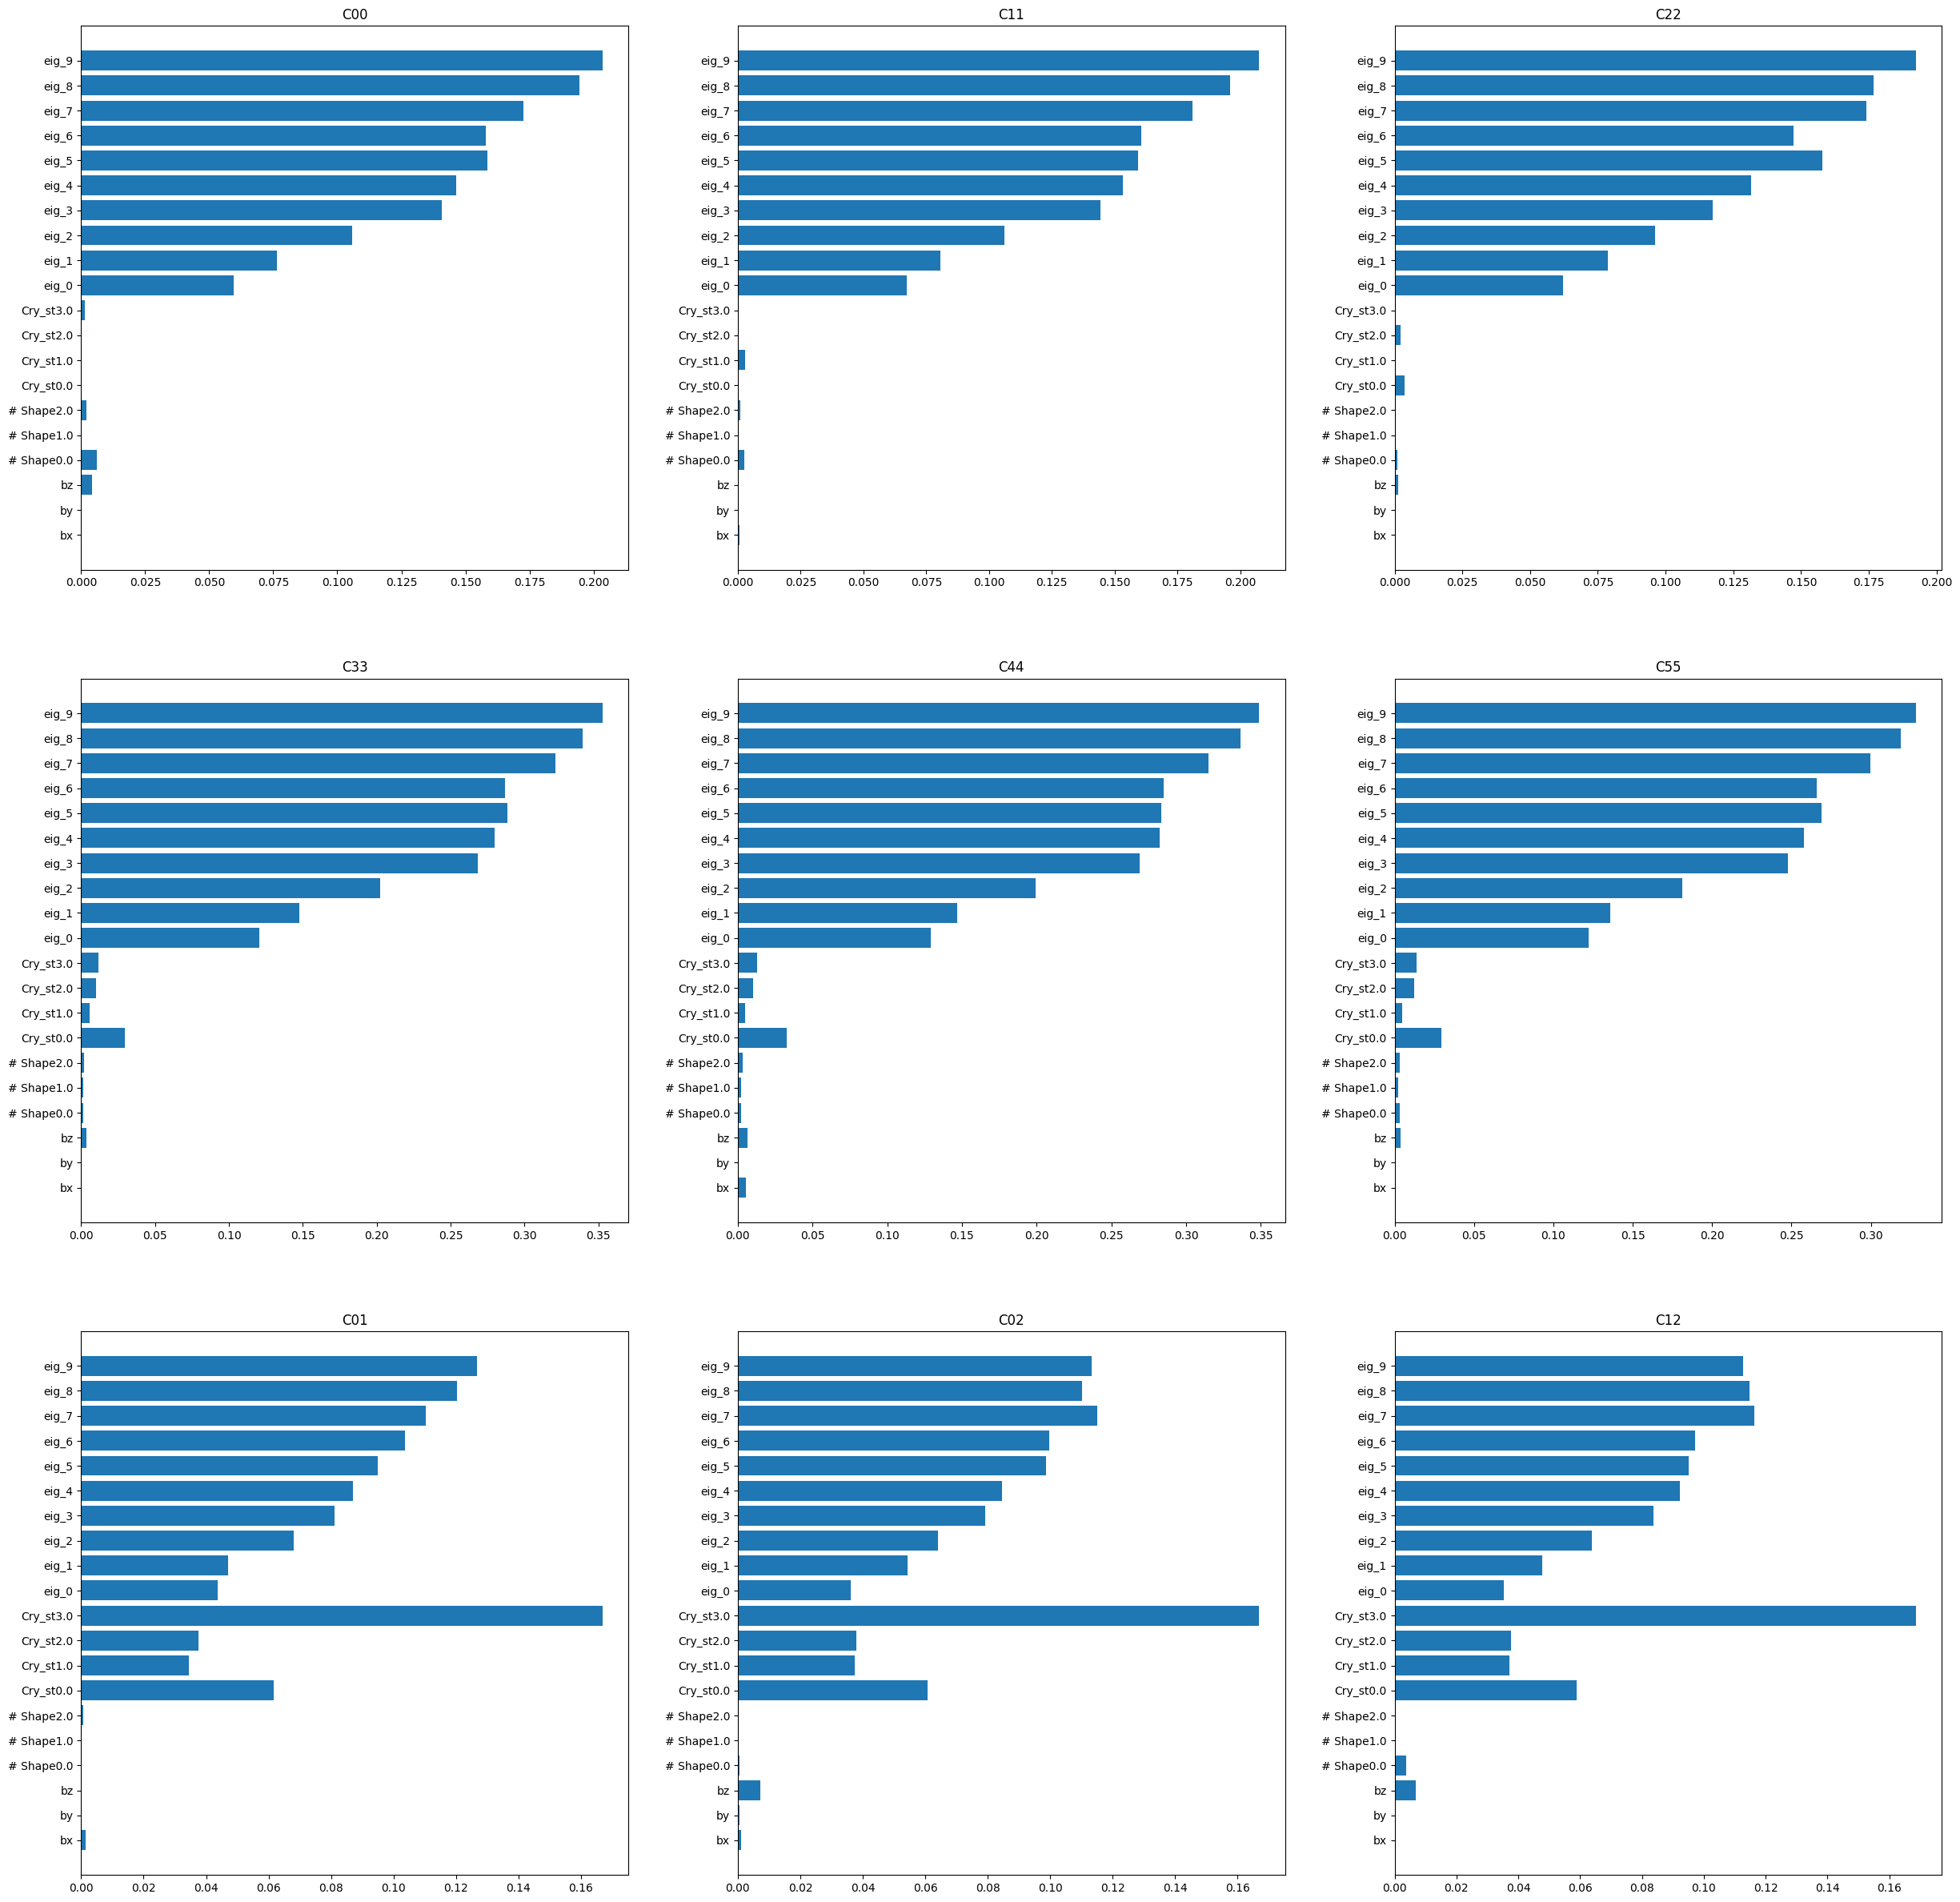

In [12]:
fig2 = plt.figure(figsize = (30,30))
for i in range(len(targets)):
    num = int(str(33) + str(i+1))
    target = targets[i]
    ax = fig2.add_subplot(num)
    ax.barh(listas_nuevas[i], MI_nuevas[i])
    ax.set_title(target)